In [1]:
%display latex

In [2]:
#Mainfold creation
Mfold = Manifold(4,'Mfold',structure='Lorentzian')
#Spherical Coordinate System
X.<t,r,th,ph> = Mfold.chart(r"t r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi")

In [3]:
#Mass and proper time definition
M = var('M')
tau = var('tau', latex_name=r"\tau")
assume(M>=0)

In [4]:
g = Mfold.metric()
g[0,0] = -1
g[1,1] = 1
g[2,2] = r^2
g[3,3] = (r*sin(th))^2

In [5]:
g[:]

[           -1             0             0             0]
[            0             1             0             0]
[            0             0           r^2             0]
[            0             0             0 r^2*sin(th)^2]

In [6]:
gamma = g.connection()
gamma.display()
gamma.display(only_nonredundant=True)

Gam^r_th,th = -r 
Gam^r_ph,ph = -r*sin(th)^2 
Gam^th_r,th = 1/r 
Gam^th_ph,ph = -cos(th)*sin(th) 
Gam^ph_r,ph = 1/r 
Gam^ph_th,ph = cos(th)/sin(th)

## Known Spherically Symmetric Metrics
General form of a static spherically symmetric metric:
\begin{equation}
    ds^2 = - F(r)dt^2 + \frac{dr^2}{F(r)} + r^2d\theta^2 + r^2\sin^2(\theta)d\phi^2 
\end{equation}

##### Schwarzschield
\begin{equation}
    F(r) = 1 - \frac{2m}{r}
\end{equation}

In [7]:
S(r) = 1-2*M/r 
g = Mfold.metric()
g[0,0] = -S
g[1,1] = 1/S
g[2,2] = r^2
g[3,3] = (r*sin(th))^2

In [8]:
ricci2 = g.ricci_scalar()
ricci2.display()

r(g): Mfold → ℝ
   (t, r, th, ph) ↦ 0

##### Hayward
\begin{equation}
    F(r) = 1 - \frac{2mr^2}{r^3+2l^2m}
\end{equation}

l = var("l")  #Energy Density at the center
H(r) = 1 - (2*M*r**2)/(r**3+2*l**2*M)
g = Mfold.metric()
g[0,0] = -H.subs(l=1)
g[1,1] = 1/H.subs(l=1)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2

##### Bardeen
\begin{equation}
    F(r) = 1 - \frac{2mr^2}{(r^2+q^2)^{3/2}}
\end{equation}

o = var('o') #Magnetic charge
B(r) = 1 - (2*M*r**2)/sqrt(r**2+o**2)**(3)
g = Mfold.metric()
g[0,0] = -B.subs(o=1)
g[1,1] = 1/B.subs(o=1)
g[2,2] = r**2
g[3,3] = (r*sin(th))**2

## EDO system

In [9]:
#Partial derivatives
u0 = var('u0', latex_name=r"u^0")
u1 = var('u1', latex_name=r"u^1")
u2 = var('u2', latex_name=r"u^2")
u3 = var('u3', latex_name=r"u^3")
u=[u0,u1,0,u3]
#Connections in Equatorial motion
gamma = g.connection()

En el plano ecuatorial ($\theta=\pi/2$), $M=1$:

In [10]:
#4-velocity
dU=[0,0,0,0]
for i in range(4):
    for j in range(4):
        for k in range(4):
            dU[k]-=gamma[k,i,j].expr().subs(th=pi/2, M=1)*u[i]*u[j]

In [11]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Equations system 

LatexExpr(r"\frac{du^0(\tau)}{d\tau} =") + latex(dU[0]) 
LatexExpr(r"\frac{dt(\tau)}{d\tau} =") + latex(u0)
LatexExpr(r"\frac{du^1(\tau)}{d\tau} =") + latex(dU[1])
LatexExpr(r"\frac{dr(\tau)}{d\tau} =") + latex(u1)
LatexExpr(r"\frac{du^2(\tau)}{d\tau} =") + latex(dU[2]) 
LatexExpr(r"\frac{d\theta(\tau)}{d\tau} =") + latex(u2)
LatexExpr(r"\frac{du^3(\tau)}{d\tau} =") + latex(dU[3])
LatexExpr(r"\frac{d\phi(\tau)}{d\tau} =") + latex(u3)

\frac{d\phi(\tau)}{d\tau} = {u^3}

The initial condition for $u^0$ comes from:
\begin{align}
    -1&=u^{\mu}u_{\mu}\\
    &=g_{\mu\nu}u^{\mu}u^{\nu}\\
    &=g_{00}\left(\frac{\partial t}{\partial\tau}\right)^2+g_{11}d\left(\frac{\partial r}{\partial\tau}\right)^2+g_{22}\left(\frac{\partial\theta}{\partial\tau}\right)^2+g_{33}\left(\frac{\partial\phi}{\partial\tau}\right)^2
\end{align}

In [12]:
#Initial Conditions
#Position
x0i = 0.
x1i = 6.
x2i = pi/2
x3i = 0.
#Velocity
u0i = -sqrt(8/9)/(g[0,0].expr().subs(r=6.,M=1.))
u1i = 0.
u2i = 0.
u3i = (sqrt(12))/(g[3,3].expr().subs(r=6.,th=pi/2))

q0 = [x0i, x1i, x3i, u0i, u1i, u3i]

In [13]:
#EDO system
f = [u0,u1,u3,dU[0],dU[1],dU[3]]
q = [t,r,ph,u0,u1,u3]
tau_i = 0.
tau_f = 10000.
tau_range =  srange(tau_i,tau_f,0.005)

In [14]:
#Integration
sol = desolve_odeint(f, q0, tau_range, q)

In [15]:
#Cartesian Coordinates
x = [sol[a][1]*cos(sol[a][2]) for a in range(len(sol))]
y = [sol[a][1]*sin(sol[a][2]) for a in range(len(sol))]

##### Schwarzschield

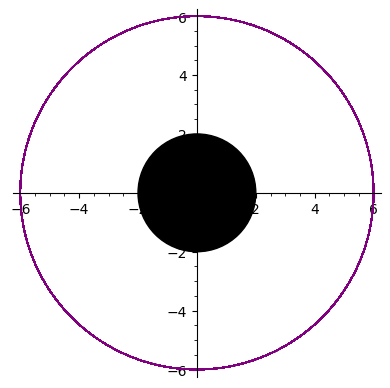

In [16]:
#Graph
BH = circle((0,0), 2, fill = True, rgbcolor='black')
Geo = list_plot(list(zip(x, y)),plotjoined=True, color='purple')
BH+Geo

### Conserved quantities

#### Energy (per unit mass)
\begin{equation}
    E = -g_{00}\dot x^0
\end{equation}

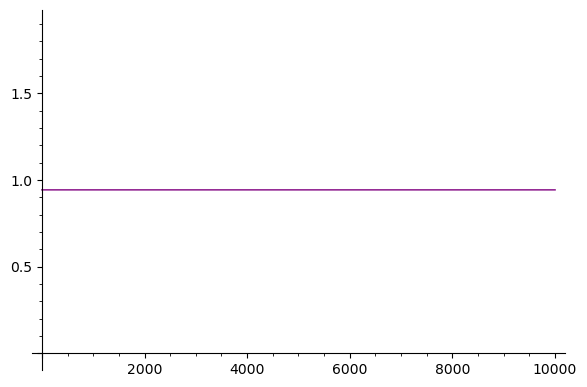

In [17]:
Energy = [-g[0,0].expr().subs(r=sol[a][1],M=1.)*sol[a][3] for a in range(len(sol))]
Energy_plot = list_plot(list(zip(tau_range, Energy)),plotjoined=True, color='purple')
Energy_plot

#### Angular Momentum
\begin{equation}
    l = g_{33}\dot x^3
\end{equation}

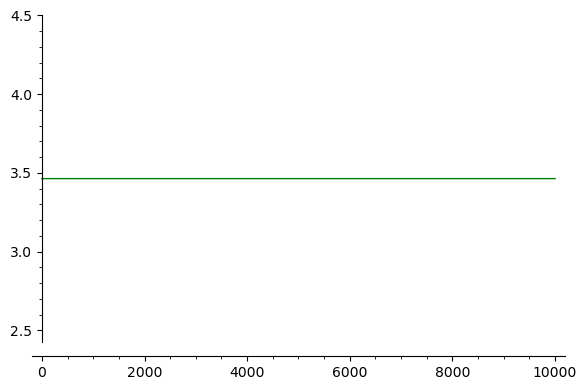

In [18]:
Angular_Momemtum = [g[3,3].expr().subs(r=sol[a][1],M=1.,th=pi/2)*sol[a][5] for a in range(len(sol))]
AM_plot = list_plot(list(zip(tau_range, Angular_Momemtum)),plotjoined=True, color='green')
AM_plot

# Hamiltonian Approach

In [19]:
l = var('l', latex_name=r"l")
e = var('e', latex_name=r"\epsilon")

p0= var('p1', latex_name=r"p^0")
p1= var('p1', latex_name=r"p^1")
p2= var('p1', latex_name=r"p^2")
p3= var('p1', latex_name=r"p^3")

g_uu=g.up(g)

dp1=diff(g_uu[0,0].expr(),r)*e**2/2+diff(g_uu[1,1].expr(),r)*p1**2/2+diff(g_uu[3,3].expr().subs(th=pi/2),r)*l**2/2
dp1

1/2*e^2*(1/(2*M - r) + r/(2*M - r)^2) + 1/2*p1^2*((2*M - r)/r^2 + 1/r) - l^2/r^3

In [20]:
dX=[e/g[0,0].expr().subs(M=1),p1/g[1,1].expr().subs(M=1),0,l/g[3,3].expr().subs(th=pi/2)]

In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Equations system 
LatexExpr(r"\frac{dt(\tau)}{d\tau} =") + latex(dX[0])
LatexExpr(r"\frac{dr(\tau)}{d\tau} =") + latex(dX[1])
LatexExpr(r"\frac{d\phi(\tau)}{d\tau} =") + latex(dX[3])
LatexExpr(r"\frac{dp^1(\tau)}{d\tau} =") + latex(dp1.subs(M=1))

\frac{dt(\tau)}{d\tau} = \frac{{\epsilon}}{\frac{2}{r} - 1}

\frac{dr(\tau)}{d\tau} = -{p^3} {\left(\frac{2}{r} - 1\right)}

\frac{d\phi(\tau)}{d\tau} = \frac{{l}}{r^{2}}

\frac{dp^1(\tau)}{d\tau} = -\frac{1}{2} \, {\epsilon}^{2} {\left(\frac{1}{r - 2} - \frac{r}{{\left(r - 2\right)}^{2}}\right)} - \frac{1}{2} \, {p^3}^{2} {\left(\frac{r - 2}{r^{2}} - \frac{1}{r}\right)} - \frac{{l}^{2}}{r^{3}}

In [22]:
#Initial Conditions
#Position
x0i = 0.
x1i = 6.
x2i = pi/2
x3i = 0.
#Velocity
p0i = -sqrt(8/9)
p2i = 0.
p3i = sqrt(12)
p1i =sqrt((-1-g_uu[0,0].expr().subs(M=1)*p0i**2-g_uu[2,2].expr().subs(M=1)*p2i**2-g_uu[3,3].expr().subs(M=1,th=pi/2)*p3i**2)/(g_uu[1,1].expr().subs(M=1))).subs(r=x1i)

qh0 = [x0i,x1i, x3i, p1i]

In [23]:
#EDO system
fh = [dX[0].subs(e=p0i),dX[1],dX[3].subs(l=p3i),dp1(e=p0i,l=p3i,M=1)]
qh = [t,r,ph,p1]
tau_ih = 0.
tau_fh = 10000.
tau_rangeh =  srange(tau_ih,tau_fh,0.05)
fh

[-2/3*sqrt(2)/(2/r - 1),
 -p1*(2/r - 1),
 2*sqrt(3)/r^2,
 -1/2*p1^2*((r - 2)/r^2 - 1/r) - 4/9/(r - 2) + 4/9*r/(r - 2)^2 - 12/r^3]

In [24]:
#Integration
solH = desolve_odeint(fh, qh0, tau_rangeh, qh)

In [25]:
#Cartesian Coordinates
xh = [solH[a][1]*cos(solH[a][2]) for a in range(len(solH))]
yh = [solH[a][1]*sin(solH[a][2]) for a in range(len(solH))]

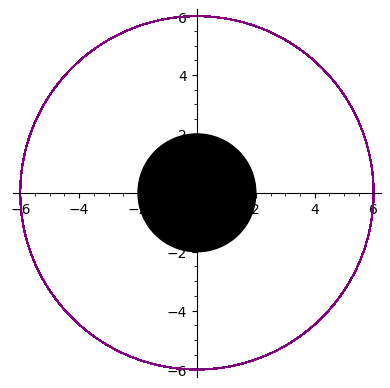

In [26]:
#Graph
BH = circle((0,0), 2, fill = True, rgbcolor='black')
GeoH = list_plot(list(zip(xh, yh)),plotjoined=True, color='purple')
BH+GeoH